# PySpark SQL
Crear un entorno virtual o instalar las librerías en el entorno base

#### Install OpenJDK 11
conda install openjdk
#### brew install openjdk

#### Install PySpark using Conda
conda install pyspark

#### In order to run PySpark in Jupyter notebook first, you need to find the PySpark Install
conda install -c conda-forge findspark


Thanks to PySpark Documentation : https://sparkbyexamples.com/pyspark/install-pyspark-in-anaconda-jupyter-notebook/

> * Una vez tenemos instalado pyspark, java y jupyter-lab en nuestro entorno de trabajo con conda.
> * Corremos el siguiente comando para solucionar errores de activación dl pyspark en el jupyter

In [59]:
#import findspark

#findspark.init()
#findspark.find()


'/usr/local/opt/apache-spark/libexec'

In [61]:
# Import PySpark
from pyspark.sql import SparkSession


In [71]:
#Se importan todos los modulos de sql de pyspark
from pyspark.sql import *

In [62]:
# Create SparkSession
import pyspark
from pyspark.sql import SparkSession

23/02/21 13:34:58 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


# Create DataFrames

In [66]:
#First: Create two DataFrames to make join operations

spark = SparkSession.builder.appName("sparkbyexamples.com").getOrCreate()

emp = [(1,"Smith",-1,"2018","10","M",3000), \
    (2,"Rose",1,"2010","20","M",4000), \
    (3,"Williams",1,"2010","10","M",1000), \
    (4,"Jones",2,"2005","10","F",2000), \
    (5,"Brown",2,"2010","40","",-1), \
      (6,"Brown",2,"2010","50","",-1) \
  ]
empColumns = ["emp_id","name","superior_emp_id","year_joined", \
       "emp_dept_id","gender","salary"]

#Crea 
empDF = spark.createDataFrame(data=emp, schema = empColumns)
empDF.printSchema() #This prints emp DataFrame to console.
empDF.show(truncate=False)

dept = [("Finance",10), \
    ("Marketing",20), \
    ("Sales",30), \
    ("IT",40) \
  ]
deptColumns = ["dept_name","dept_id"]
deptDF = spark.createDataFrame(data=dept, schema = deptColumns)
deptDF.printSchema()#This prints dept DataFrame to console.
deptDF.show(truncate=False)


23/02/21 13:35:22 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.
root
 |-- emp_id: long (nullable = true)
 |-- name: string (nullable = true)
 |-- superior_emp_id: long (nullable = true)
 |-- year_joined: string (nullable = true)
 |-- emp_dept_id: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- salary: long (nullable = true)



+------+--------+---------------+-----------+-----------+------+------+
|emp_id|name    |superior_emp_id|year_joined|emp_dept_id|gender|salary|
+------+--------+---------------+-----------+-----------+------+------+
|1     |Smith   |-1             |2018       |10         |M     |3000  |
|2     |Rose    |1              |2010       |20         |M     |4000  |
|3     |Williams|1              |2010       |10         |M     |1000  |
|4     |Jones   |2              |2005       |10         |F     |2000  |
|5     |Brown   |2              |2010       |40         |      |-1    |
|6     |Brown   |2              |2010       |50         |      |-1    |
+------+--------+---------------+-----------+-----------+------+------+

root
 |-- dept_name: string (nullable = true)
 |-- dept_id: long (nullable = true)



+---------+-------+
|dept_name|dept_id|
+---------+-------+
|Finance  |10     |
|Marketing|20     |
|Sales    |30     |
|IT       |40     |
+---------+-------+



In [68]:
empDF.select("name").show()

+--------+
|    name|
+--------+
|   Smith|
|    Rose|
|Williams|
|   Jones|
|   Brown|
|   Brown|
+--------+



### PySpark DataFrame Join Type
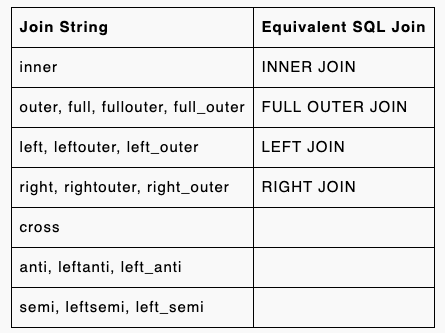



 #### `Inner join`
 * is the default join and it’s mostly used, this joins two DataFrames on key columns,
 * where keys don’t match the rows get dropped from both datasets (emp & dept).
 * To do an `inner` join on two PySpark DataFrame you should use inner as join type.

**Note**: Be sure to import all modules from pyspark.sql
`from pyspark.sql import *`

In [111]:
# Inner join
empDF.join(deptDF,empDF.emp_dept_id ==  deptDF.dept_id,"inner") \
     .show(truncate=False)

+------+--------+---------------+-----------+-----------+------+------+---------+-------+
|emp_id|name    |superior_emp_id|year_joined|emp_dept_id|gender|salary|dept_name|dept_id|
+------+--------+---------------+-----------+-----------+------+------+---------+-------+
|1     |Smith   |-1             |2018       |10         |M     |3000  |Finance  |10     |
|3     |Williams|1              |2010       |10         |M     |1000  |Finance  |10     |
|4     |Jones   |2              |2005       |10         |F     |2000  |Finance  |10     |
|2     |Rose    |1              |2010       |20         |M     |4000  |Marketing|20     |
|5     |Brown   |2              |2010       |40         |      |-1    |IT       |40     |
+------+--------+---------------+-----------+-----------+------+------+---------+-------+



In [104]:
inner_df = empDF.join(deptDF,empDF.emp_dept_id ==  deptDF.dept_id,"inner")
inner_df

DataFrame[emp_id: bigint, name: string, superior_emp_id: bigint, year_joined: string, emp_dept_id: string, gender: string, salary: bigint, dept_name: string, dept_id: bigint]

#### `Outer join`
 * This join returns **all rows** from both datasets
 * where join expression doesn't match it returns null on respective columns. 

**Note**: Be sure to import all modules from pyspark.sql
`from pyspark.sql import *`

In [86]:
# Outer join
empDF.join(deptDF,empDF.emp_dept_id == deptDF.dept_id,"outer") \
    .show(truncate=False)

+------+--------+---------------+-----------+-----------+------+------+---------+-------+
|emp_id|name    |superior_emp_id|year_joined|emp_dept_id|gender|salary|dept_name|dept_id|
+------+--------+---------------+-----------+-----------+------+------+---------+-------+
|1     |Smith   |-1             |2018       |10         |M     |3000  |Finance  |10     |
|3     |Williams|1              |2010       |10         |M     |1000  |Finance  |10     |
|4     |Jones   |2              |2005       |10         |F     |2000  |Finance  |10     |
|2     |Rose    |1              |2010       |20         |M     |4000  |Marketing|20     |
|null  |null    |null           |null       |null       |null  |null  |Sales    |30     |
|5     |Brown   |2              |2010       |40         |      |-1    |IT       |40     |
|6     |Brown   |2              |2010       |50         |      |-1    |null     |null   |
+------+--------+---------------+-----------+-----------+------+------+---------+-------+



In [84]:
# Full join
empDF.join(deptDF,empDF.emp_dept_id == deptDF.dept_id,"full") \
        .show(truncate=False)

+------+--------+---------------+-----------+-----------+------+------+---------+-------+
|emp_id|name    |superior_emp_id|year_joined|emp_dept_id|gender|salary|dept_name|dept_id|
+------+--------+---------------+-----------+-----------+------+------+---------+-------+
|1     |Smith   |-1             |2018       |10         |M     |3000  |Finance  |10     |
|3     |Williams|1              |2010       |10         |M     |1000  |Finance  |10     |
|4     |Jones   |2              |2005       |10         |F     |2000  |Finance  |10     |
|2     |Rose    |1              |2010       |20         |M     |4000  |Marketing|20     |
|null  |null    |null           |null       |null       |null  |null  |Sales    |30     |
|5     |Brown   |2              |2010       |40         |      |-1    |IT       |40     |
|6     |Brown   |2              |2010       |50         |      |-1    |null     |null   |
+------+--------+---------------+-----------+-----------+------+------+---------+-------+



In [87]:
#Full Outer
empDF.join(deptDF,empDF.emp_dept_id == deptDF.dept_id,"fullouter")\
    .show(truncate=False)


+------+--------+---------------+-----------+-----------+------+------+---------+-------+
|emp_id|name    |superior_emp_id|year_joined|emp_dept_id|gender|salary|dept_name|dept_id|
+------+--------+---------------+-----------+-----------+------+------+---------+-------+
|1     |Smith   |-1             |2018       |10         |M     |3000  |Finance  |10     |
|3     |Williams|1              |2010       |10         |M     |1000  |Finance  |10     |
|4     |Jones   |2              |2005       |10         |F     |2000  |Finance  |10     |
|2     |Rose    |1              |2010       |20         |M     |4000  |Marketing|20     |
|null  |null    |null           |null       |null       |null  |null  |Sales    |30     |
|5     |Brown   |2              |2010       |40         |      |-1    |IT       |40     |
|6     |Brown   |2              |2010       |50         |      |-1    |null     |null   |
+------+--------+---------------+-----------+-----------+------+------+---------+-------+



In [93]:
#Guardo este ultimo join en un DataFrame
df3 = empDF.join(deptDF,empDF.emp_dept_id == deptDF.dept_id,"fullouter")
df3

DataFrame[emp_id: bigint, name: string, superior_emp_id: bigint, year_joined: string, emp_dept_id: string, gender: string, salary: bigint, dept_name: string, dept_id: bigint]

#### `semi join` `leftsemi` `left_semi`
 * This join is similar to `inner`
 * `leftsemi` join returns all columns from the left dataset and ignores all columns from the right dataset. 
 * This join returns columns from the only left dataset for the records match in the right dataset on join expression
 * Records not matched on join expression are ignored from both left and right datasets. 

**Note**: The same result can be achieved using select on the result of the inner join however, using this join would be efficient. 

In [112]:
empDF.join(deptDF,empDF.emp_dept_id ==  deptDF.dept_id,"leftsemi") \
   .show(truncate=False)

+------+--------+---------------+-----------+-----------+------+------+
|emp_id|name    |superior_emp_id|year_joined|emp_dept_id|gender|salary|
+------+--------+---------------+-----------+-----------+------+------+
|1     |Smith   |-1             |2018       |10         |M     |3000  |
|3     |Williams|1              |2010       |10         |M     |1000  |
|4     |Jones   |2              |2005       |10         |F     |2000  |
|2     |Rose    |1              |2010       |20         |M     |4000  |
|5     |Brown   |2              |2010       |40         |      |-1    |
+------+--------+---------------+-----------+-----------+------+------+



#### `anti join` `leftanti` `left_anti`
 * `leftanti` join does the exact opposite of the `leftsemi`
 * `leftanti` join returns only columns from the left dataset for non-matched records. 

In [113]:
empDF.join(deptDF,empDF.emp_dept_id ==  deptDF.dept_id,"leftanti") \
   .show(truncate=False)

+------+-----+---------------+-----------+-----------+------+------+
|emp_id|name |superior_emp_id|year_joined|emp_dept_id|gender|salary|
+------+-----+---------------+-----------+-----------+------+------+
|6     |Brown|2              |2010       |50         |      |-1    |
+------+-----+---------------+-----------+-----------+------+------+



# PySpark Self Join

* **Joins** are not complete without a `self join`.
* Though there is no self-join type available, we can use any of the above-explained join types to join DataFrame to itself. 


In [115]:
from pyspark.sql import Column

In [117]:

empDF.alias("emp1").join(empDF.alias("emp2"), \
    col("emp1.superior_emp_id") == col("emp2.emp_id"),"inner") \
    .select(col("emp1.emp_id"),col("emp1.name"), \
      col("emp2.emp_id").alias("superior_emp_id"), \
      col("emp2.name").alias("superior_emp_name")) \
   .show(truncate=False)

NameError: name 'col' is not defined

# SQL Traditional Sentences
* Since **PySpark SQL** support **native SQL** syntax, we can also write join operations after creating temporary tables on DataFrames.
* These temporary tables are created by `name_table.createOrReplaceTempView("name_temporary_table")`
* We can use these tables on `spark.sql()`.

In [118]:
empDF.createOrReplaceTempView("EMP")
deptDF.createOrReplaceTempView("DEPT")

joinDF = spark.sql("select * from EMP e, DEPT d where e.emp_dept_id == d.dept_id") \
  .show(truncate=False)

joinDF2 = spark.sql("select * from EMP e INNER JOIN DEPT d ON e.emp_dept_id == d.dept_id") \
  .show(truncate=False)

+------+--------+---------------+-----------+-----------+------+------+---------+-------+
|emp_id|name    |superior_emp_id|year_joined|emp_dept_id|gender|salary|dept_name|dept_id|
+------+--------+---------------+-----------+-----------+------+------+---------+-------+
|1     |Smith   |-1             |2018       |10         |M     |3000  |Finance  |10     |
|3     |Williams|1              |2010       |10         |M     |1000  |Finance  |10     |
|4     |Jones   |2              |2005       |10         |F     |2000  |Finance  |10     |
|2     |Rose    |1              |2010       |20         |M     |4000  |Marketing|20     |
|5     |Brown   |2              |2010       |40         |      |-1    |IT       |40     |
+------+--------+---------------+-----------+-----------+------+------+---------+-------+



+------+--------+---------------+-----------+-----------+------+------+---------+-------+
|emp_id|name    |superior_emp_id|year_joined|emp_dept_id|gender|salary|dept_name|dept_id|
+------+--------+---------------+-----------+-----------+------+------+---------+-------+
|1     |Smith   |-1             |2018       |10         |M     |3000  |Finance  |10     |
|3     |Williams|1              |2010       |10         |M     |1000  |Finance  |10     |
|4     |Jones   |2              |2005       |10         |F     |2000  |Finance  |10     |
|2     |Rose    |1              |2010       |20         |M     |4000  |Marketing|20     |
|5     |Brown   |2              |2010       |40         |      |-1    |IT       |40     |
+------+--------+---------------+-----------+-----------+------+------+---------+-------+



In [91]:
empDF.createOrReplaceTempView("empDF")
df2 = spark.sql("SELECT * from empDF")
df2.collect()

[Row(emp_id=1, name='Smith', superior_emp_id=-1, year_joined='2018', emp_dept_id='10', gender='M', salary=3000),
 Row(emp_id=2, name='Rose', superior_emp_id=1, year_joined='2010', emp_dept_id='20', gender='M', salary=4000),
 Row(emp_id=3, name='Williams', superior_emp_id=1, year_joined='2010', emp_dept_id='10', gender='M', salary=1000),
 Row(emp_id=4, name='Jones', superior_emp_id=2, year_joined='2005', emp_dept_id='10', gender='F', salary=2000),
 Row(emp_id=5, name='Brown', superior_emp_id=2, year_joined='2010', emp_dept_id='40', gender='', salary=-1),
 Row(emp_id=6, name='Brown', superior_emp_id=2, year_joined='2010', emp_dept_id='50', gender='', salary=-1)]

In [98]:
# Traeme tdoos los departamentos cuyo promedio de salarios >3000
df3.createOrReplaceTempView("empDF")
salary = spark.sql("SELECT dept_name, AVG(salary) from empDF group by dept_name having AVG(salary)>=1000")
salary.show()
 

+---------+-----------+
|dept_name|avg(salary)|
+---------+-----------+
|  Finance|     2000.0|
|Marketing|     4000.0|
+---------+-----------+



In [105]:
inner_df.createOrReplaceTempView("empDF")
salary = spark.sql("SELECT dept_name, SUM(salary) from empDF group by dept_name")
salary.show()

+---------+-----------+
|dept_name|sum(salary)|
+---------+-----------+
|  Finance|       6000|
|Marketing|       4000|
|       IT|         -1|
+---------+-----------+



In [ ]:
# Funciones de agregacion ---> sum, avg,count
#Para aplicar condiciones a funciones de agregación también se peude utilizar el having
# WHERE --> condición a registros individuales (antes de hacer un group by)


In [110]:
inner_df.createOrReplaceTempView("inner_df")
salary = spark.sql("SELECT dept_name, SUM(salary) as Women_Salary from inner_df WHERE gender= 'F' group by dept_name")
salary.show()

+---------+------------+
|dept_name|Women_Salary|
+---------+------------+
|  Finance|        2000|
+---------+------------+



# Join on multiple DataFrames


df1.join(df2,df1.id1 == df2.id2,"inner") \
   .join(df3,df1.id1 == df3.id3,"inner")
   
#_Este se puede correr caundo tienes 4 o más dataframes
